### Imports


In [2]:
# Autoreload modules
# %load_ext autoreload
# %autoreload 2

import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import patches
from skimage.measure import regionprops
import numpy as np
import sys

# Import custom modules
src_dir = "../src"
sys.path.append(src_dir)

from utils.data import get_fashion_img_seg, get_random_voc_img, get_voc_img
from utils.draw import imshow_many, filter_color
from utils.data_augmentation import voc_data_augmentation, crop_resize, log


### Data directories


The `$voc_dir` (.VOCdevkit/VOC2012/) should have the following structure:
* Annotations
* ImageSets
* JPEGImages
* SegmentationClass
* SegmentationObject

BBox formats:
* COCO: [xmin, ymin, width, height]
* Pascal VOC: [xmin, ymin, xmax, ymax]

In [5]:
data_dir = '../../_data/'


# ======================================================================
# PASCAL VOC 2012 dataset
voc_dir= os.path.join(data_dir, 'VOCdevkit/VOC2012/')
annot_dir = os.path.join(voc_dir, 'Annotations/')

# Instance (object) and Semantic (class) Segmentation
voc_img_dir = os.path.join(voc_dir, 'JPEGImages/')

voc_ins_seg = voc_dir + "SegmentationObject/"
voc_sem_seg = voc_dir + "SegmentationClass/"

annot_files = os.listdir(annot_dir)
voc_classes = {'aeroplane': 0, 'bicycle': 1, 'bird': 2, 'boat': 3, 'bottle': 4, 'bus': 5, 'car': 6, 
               'cat': 7, 'chair': 8, 'cow': 9, 'diningtable': 10, 'dog': 11, 'horse': 12, 'motorbike': 13, 
               'person': 14, 'pottedplant': 15, 'sheep': 16, 'sofa': 17, 'train': 18, 'tvmonitor': 19}


# ======================================================================
# Fashionpedia dataset
fashion_dir = os.path.join(data_dir, 'fashionpedia/')
# fashion_seg_dir = os.path.join(fashion_dir, "Annotations/train/")
fashion_seg_dir = os.path.join(fashion_dir, "Annotations/mask_train/")
fashion_img_dir = os.path.join(fashion_dir, "train/")
# ======================================================================

print("VOC IMGs:", len(os.listdir(voc_img_dir)))
print("VOC Annotations:", len(annot_files))
print("VOC Instance seg.:", len(os.listdir(voc_ins_seg)), "=> warning! not all imgs have segmented imgs?")
print("VOC Semantic seg.:", len(os.listdir(voc_sem_seg)), "=> warning! not all imgs have segmented imgs?")
print("Fashionpedia imgs:", len(os.listdir(fashion_img_dir)))
print("Fashionpedia seg.:", len(os.listdir(fashion_seg_dir)))

VOC IMGs: 17125
VOC Annotations: 17125
VOC Instance seg.: 2913 => warning! not all imgs have segmented imgs?
VOC Semantic seg.: 2913 => warning! not all imgs have segmented imgs?
Fashionpedia imgs: 45623
Fashionpedia seg.: 45623


### Select random VOC image/segmentation


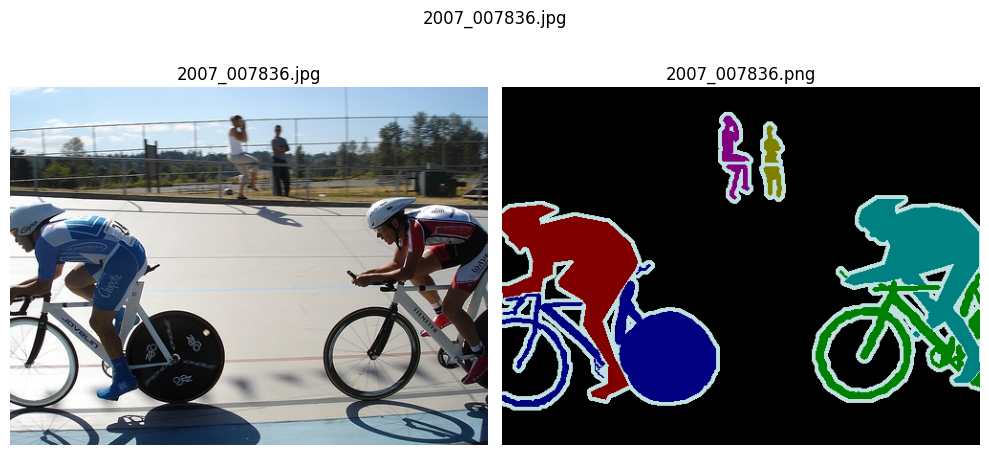

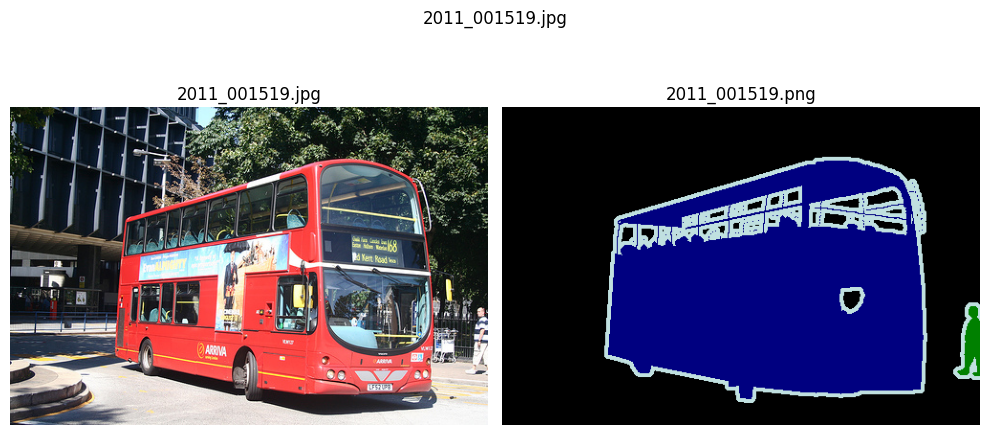

In [37]:
# Get Random VOC image
voc_img, voc_seg, voc_id = get_random_voc_img(voc_img_dir, voc_ins_seg, plot_true=True)

# Get VOC (id) image
voc_id = '2011_001519'
voc_img, voc_seg, voc_id = get_voc_img(voc_id, voc_img_dir, voc_ins_seg, plot_true=True)

### Select Fashinpedia image/segmentation


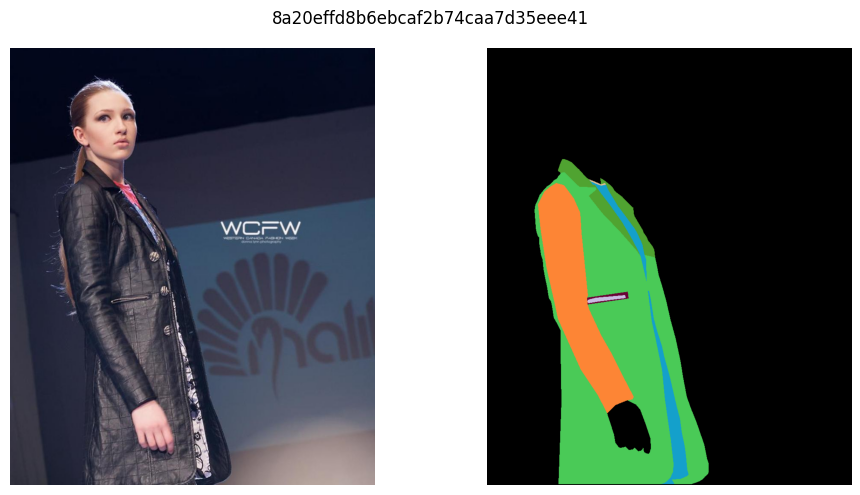

In [14]:
# 0. Select Fashion image/segmentation
img_id = "8a20effd8b6ebcaf2b74caa7d35eee41"
# img_id = "0a3e75ac695e2a5673c9d1e1356e14a2"

tar_img, tar_seg = get_fashion_img_seg(img_id, fashion_img_dir, fashion_seg_dir, plot=True)

## Task 3 - Data Augmentation

0. Select Fashion image/segmentation
1. Select VOC Image/Segmentation
2. Select Instance + Region
3. Insert VOC instance into Fashion image
   - Select random position
   - (optional) resize VOC instance
   - (optional) random rotation
   - Insert into fashion image
4. Arange Fashion segmentation



14:04:03.790 Get Fashion image/segmentation, shape: (1024, 853, 3)
14:04:03.796 Get VOC image/segmentation, shape: (333, 500, 3)
14:04:03.796 Filter VOC instance
14:04:03.906 bbox: (69, 41, 291, 352) h: 222 w: 311
14:04:03.906 Resize factor: 4.612612612612613 2.742765273311897 2.194212218649518
14:04:03.906 Crop/Resize VOC instance(333, 500, 3)
14:04:03.907 Crop/Resize VOC instance(487, 682, 3)


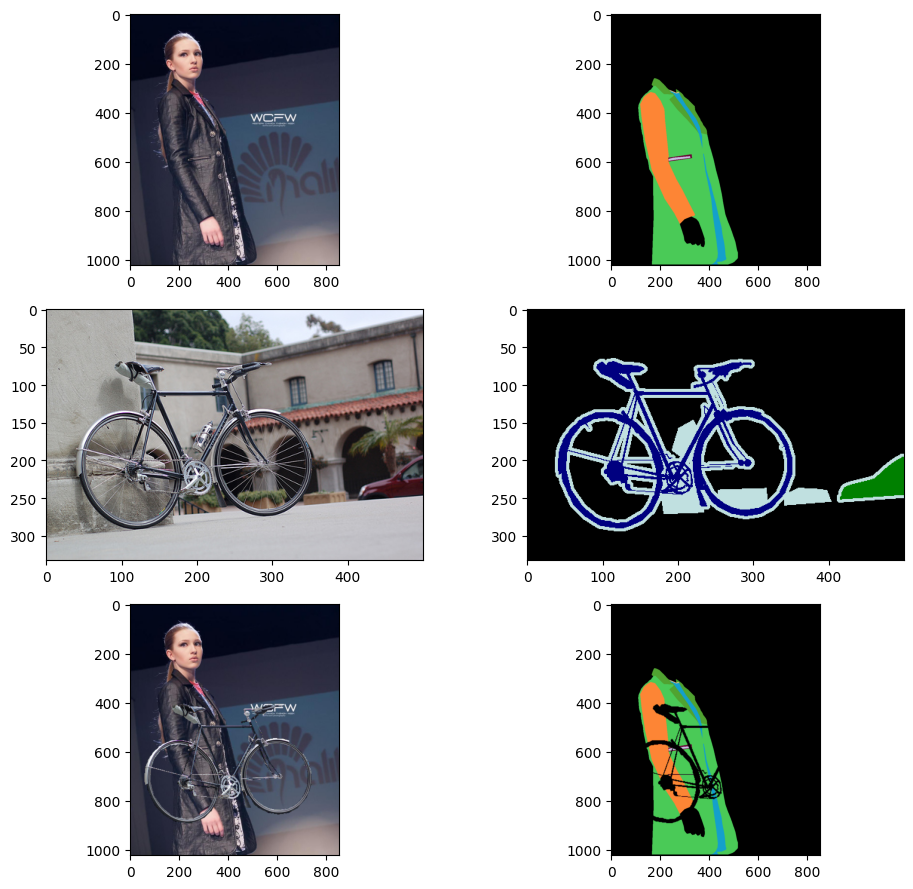

In [65]:
imgs = voc_data_augmentation(tar_img, tar_seg, voc_img_dir, voc_ins_seg, cover_factor=0.8)
imshow_many(imgs, cols=2, rows=3, axis_off=False)

### Task 3 - Data Augmentation (step by step)



13:40:11.130 Get Fashion image/segmentation, shape: (1024, 853, 3)
13:40:11.133 Get VOC image/segmentation, shape: (375, 500, 3)
13:40:11.133 Filter VOC instance
13:40:11.255 Crop/Resize VOC instance(233, 682, 3)
13:40:11.258 Plot
13:40:11.481 Finish


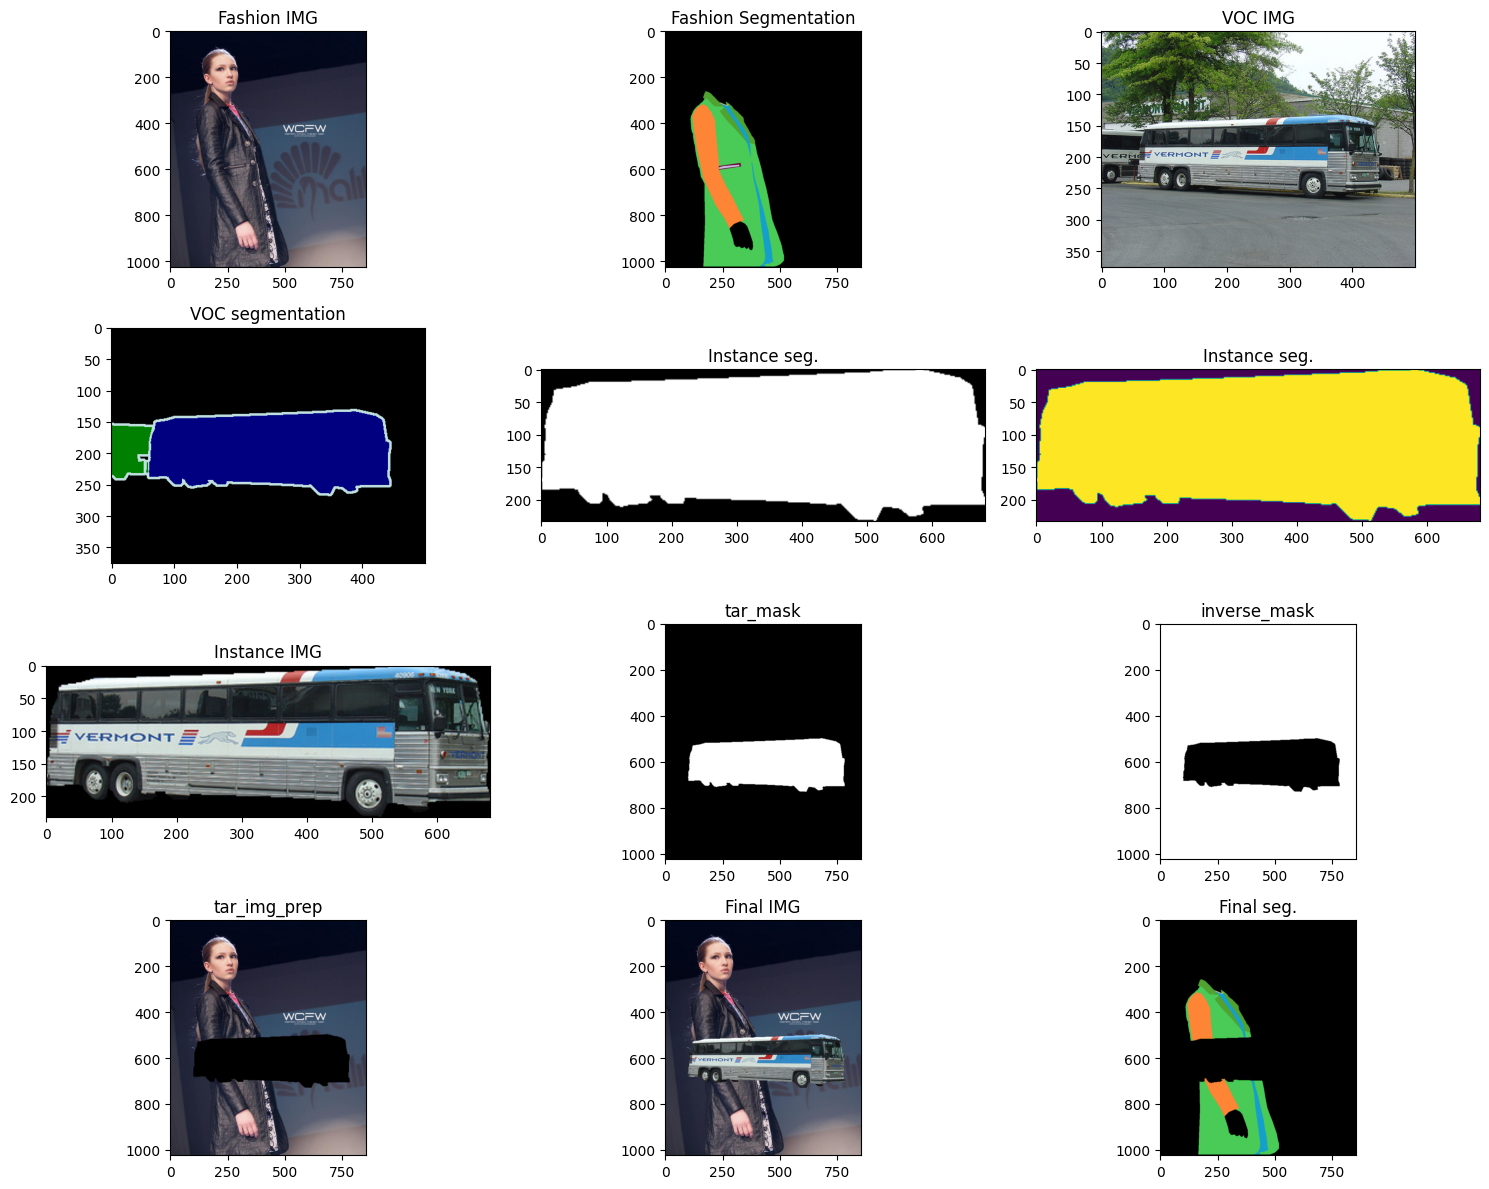

In [38]:

voc_bike, voc_monitors, voc_many = "2008_004995", "2007_007196", "2011_001530"  # => voc_chairs = '2008_007194' with something weird?

voc_bus = '2008_003373'
voc_horse = '2008_002762'


# ====================================================================================================
# 0. Select Fashion image/segmentation
img_id = "8a20effd8b6ebcaf2b74caa7d35eee41"
# img_id = "0a3e75ac695e2a5673c9d1e1356e14a2"

tar_img, tar_seg = get_fashion_img_seg(img_id, fashion_img_dir, fashion_seg_dir)
tar_shape = tar_seg.shape
log("Get Fashion image/segmentation, shape: "+ str(tar_shape))

# ====================================================================================================
# 1. Relect VOC and segmentation IMGs
voc_bike, voc_monitors, voc_many = "2008_004995", "2007_007196", "2011_001530"  # => voc_chairs = '2008_007194' with something weird?

voc_bus = '2008_003373'
voc_horse = '2008_002762'
voc_img, voc_seg, voc_id = get_voc_img(voc_bus, voc_img_dir, voc_ins_seg)


sou_img, sou_seg = voc_img, voc_seg

log("Get VOC image/segmentation, shape: " + str(sou_seg.shape))
# ====================================================================================================

# 2. Select Instance + Region
log("Filter VOC instance")
ins_seg = filter_color(sou_seg, filter_color=(255,255,255))
ins_seg_gray = cv2.cvtColor(ins_seg, cv2.COLOR_BGR2GRAY)

ins_img = sou_img.copy() # => No need to copy in production, just for testing
ins_img[~ins_seg_gray > 0] = [0,0,0]


# - (optional) resize VOC instance
sou_bbox = regionprops(ins_seg_gray)[0].bbox

# Randomly define resize_factor
h, w = sou_bbox[2]-sou_bbox[0], sou_bbox[3]-sou_bbox[1]

fy = tar_shape[0] / h
fx = tar_shape[1] / w

resize_factor = min(fy, fx)*0.8 # => Cover 80% of the target image
dsize=(int(w*resize_factor), int(h*resize_factor))

ins_seg = crop_resize(ins_seg, sou_bbox, dsize)
ins_seg_gray = crop_resize(ins_seg_gray, sou_bbox, dsize)
ins_img = crop_resize(ins_img, sou_bbox, dsize)


log("Crop/Resize VOC instance" + str(ins_seg.shape))
# - (optional) random rotation (not implemented)

# ====================================================================================================

# 3. Insert VOC instance into Fashion image
# - Select random position


x, y = 100, 500
tar_mask = np.zeros_like(tar_img)
h,w = ins_seg.shape[:2]
tar_mask[y:y+h, x:x+w] = ins_seg
inverse_mask = cv2.bitwise_not(tar_mask)

# ====================================================================================================

tar_img_prep = cv2.bitwise_and(tar_img, inverse_mask)
final_seg = cv2.bitwise_and(tar_seg, inverse_mask)
final_img = tar_img.copy()
final_img[y:y+h, x:x+w] = cv2.add(tar_img_prep[y:y+h, x:x+w], ins_img)


images = zip([tar_img, tar_seg, 
              sou_img, sou_seg, 
              ins_seg, ins_seg_gray, ins_img, tar_mask, inverse_mask, tar_img_prep, final_img, final_seg],
             ["Fashion IMG", "Fashion Segmentation", "VOC IMG", "VOC segmentation", 
              "Instance seg.", "Instance seg.", "Instance IMG", "tar_mask", "inverse_mask", "tar_img_prep", "Final IMG", "Final seg."])



log("Plot")
imshow_many(images, cols=3, rows=4, axis_off=False)
log("Finish")